# Prepare the data for analysis


In [29]:
import pandas as pd

# random data


random = pd.read_csv("../data/random.csv")


# citizen data


citizen = pd.read_csv("../data/full_citizenship_question.csv")


# illegal citizen data


illegal = pd.read_csv("../data/full_citizenship_illegal_question.csv")

In [10]:
random = random.sample(806)
citizen = citizen.sample(806)
illegal = illegal.sample(806)


In [12]:
# convert to sentences list
random_corpus = random["Message"].drop_duplicates().tolist()

citizen_corpus = citizen["Message"].drop_duplicates().tolist()

illegal_corpus = illegal["Message"].drop_duplicates().tolist()


In [15]:
# load model and encode sentences
model = SentenceTransformer("all-MiniLM-L6-v2")
random_embeddings = model.encode(random_corpus, show_progress_bar=True)
citizen_embeddings = model.encode(citizen_corpus, show_progress_bar=True)
illegal_embeddings = model.encode(illegal_corpus, show_progress_bar=True)


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

Batches:   0%|          | 0/26 [00:00<?, ?it/s]

Batches:   0%|          | 0/26 [00:00<?, ?it/s]

In [16]:
# Calculate covariance matrix
covariance_random = np.cov(random_embeddings.T)
covariance_citizen = np.cov(citizen_embeddings.T)
covariance_illegal = np.cov(illegal_embeddings.T)


In [17]:
# compute the eigenvalues and eigenvectors
eigenvalues_random, eigenvectors_random = np.linalg.eig(covariance_random)
eigenvalues_citizen, eigenvectors_citizen = np.linalg.eig(covariance_citizen)
eigenvalues_illegal, eigenvectors_illegal = np.linalg.eig(covariance_illegal)


In [18]:
eigenvectors_random

array([[-0.07224207,  0.04330359,  0.025168  , ..., -0.00560611,
        -0.02004608,  0.00114676],
       [ 0.06741439,  0.07258441,  0.0367614 , ...,  0.04990976,
         0.00831515,  0.03019402],
       [-0.01853422, -0.12614383,  0.04181192, ...,  0.01150031,
         0.00345189, -0.04007495],
       ...,
       [-0.00645345, -0.01339744, -0.03113417, ...,  0.03969033,
        -0.0356208 ,  0.04563457],
       [ 0.02035208,  0.13167018,  0.09203641, ..., -0.05417988,
        -0.01674474,  0.01992161],
       [ 0.01508008,  0.00992288,  0.00195226, ...,  0.12721264,
        -0.07407324, -0.03904516]])

/var/folders/96/s986q0cx0_383y97_xl7jzdw0000gn/T/ipykernel_33926/1170820061.py:11: RuntimeWarning: invalid value encountered in log
  sns.lineplot(np.log(sorted(eigenvalues_citizen, reverse=True)), label="citizen")


<Axes: title={'center': 'Eigenvalues of Covariance Matrix'}, ylabel='Egenvalues (log scale)'>

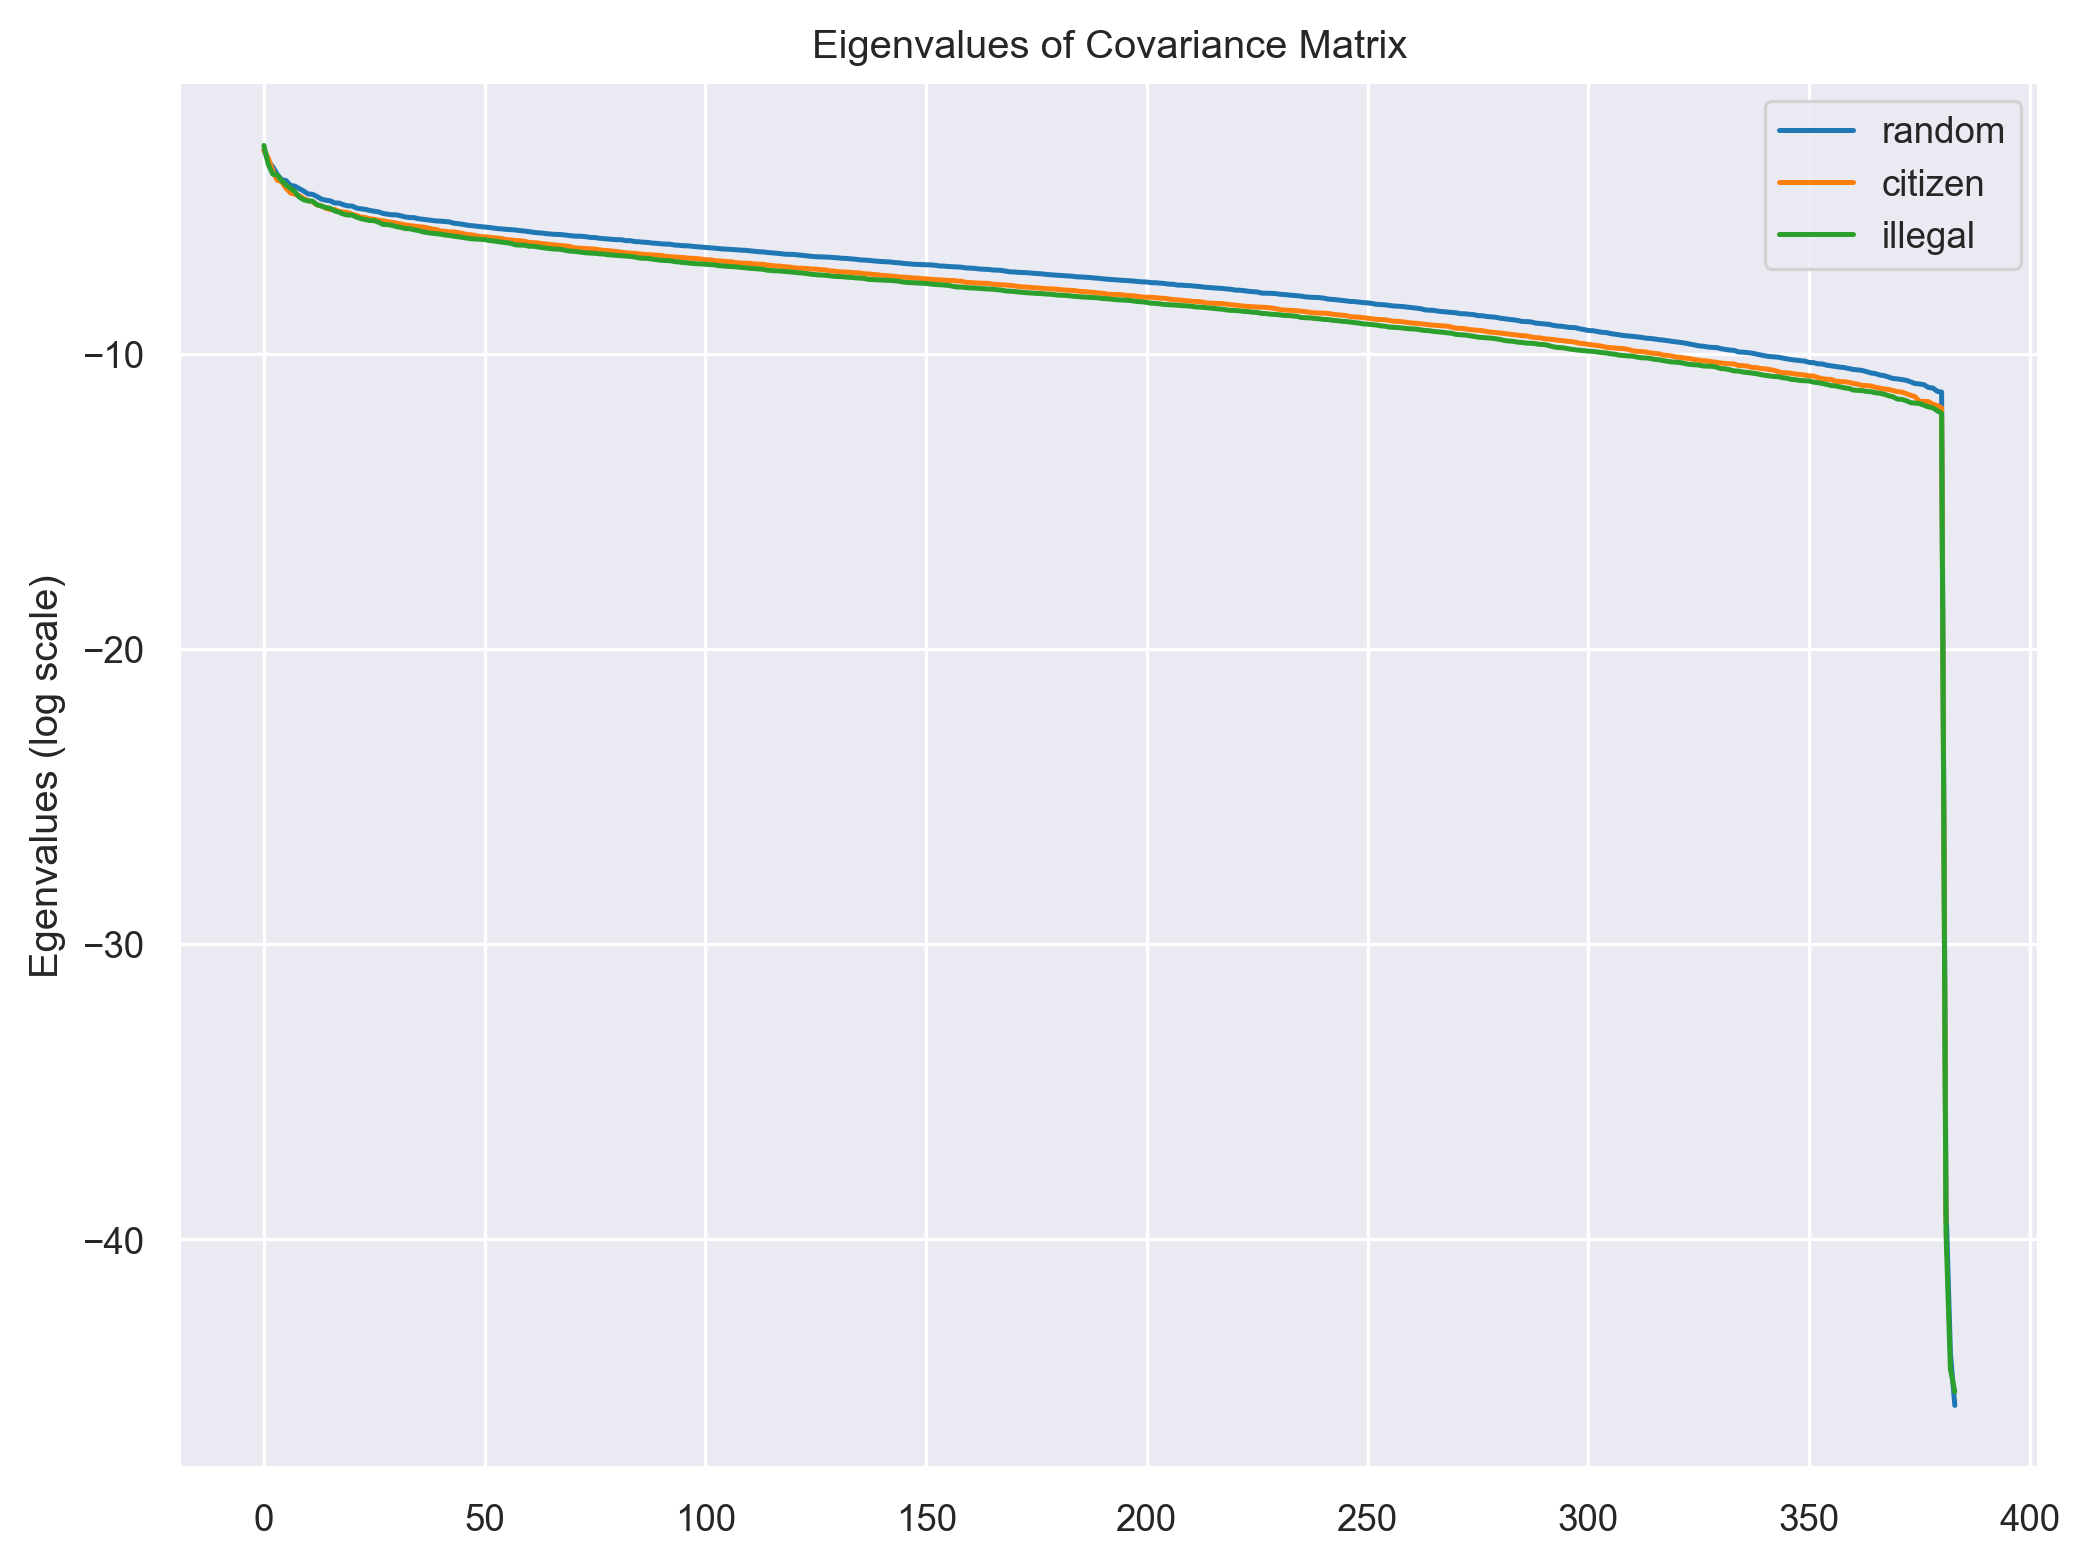

In [19]:
# using seaborn plot the eigenvalues in log scale
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8, 6), dpi=300)
plt.title("Eigenvalues of Covariance Matrix")
plt.ylabel("Egenvalues (log scale)")
sns.lineplot(np.log(sorted(eigenvalues_random, reverse=True)), label="random")
sns.lineplot(np.log(sorted(eigenvalues_citizen, reverse=True)), label="citizen")
sns.lineplot(np.log(sorted(eigenvalues_illegal, reverse=True)), label="illegal")


random:  0.6699133684604549
citizen:  0.5126052993731184
illegal:  0.4845762271625026
random max:  0.04472794363380966
citizen max:  0.044469783410765205
illegal max:  0.05227044654597471


/var/folders/96/s986q0cx0_383y97_xl7jzdw0000gn/T/ipykernel_33926/3572173729.py:19: RuntimeWarning: invalid value encountered in log
  sns.lineplot(np.log(sorted(eigenvalues_citizen / sum_citizen, reverse=True)), label="citizen")


<Axes: title={'center': 'Normalized (by sum) Eigenvalues of Covariance Matrix'}, ylabel='Egenvalues (log scale)'>

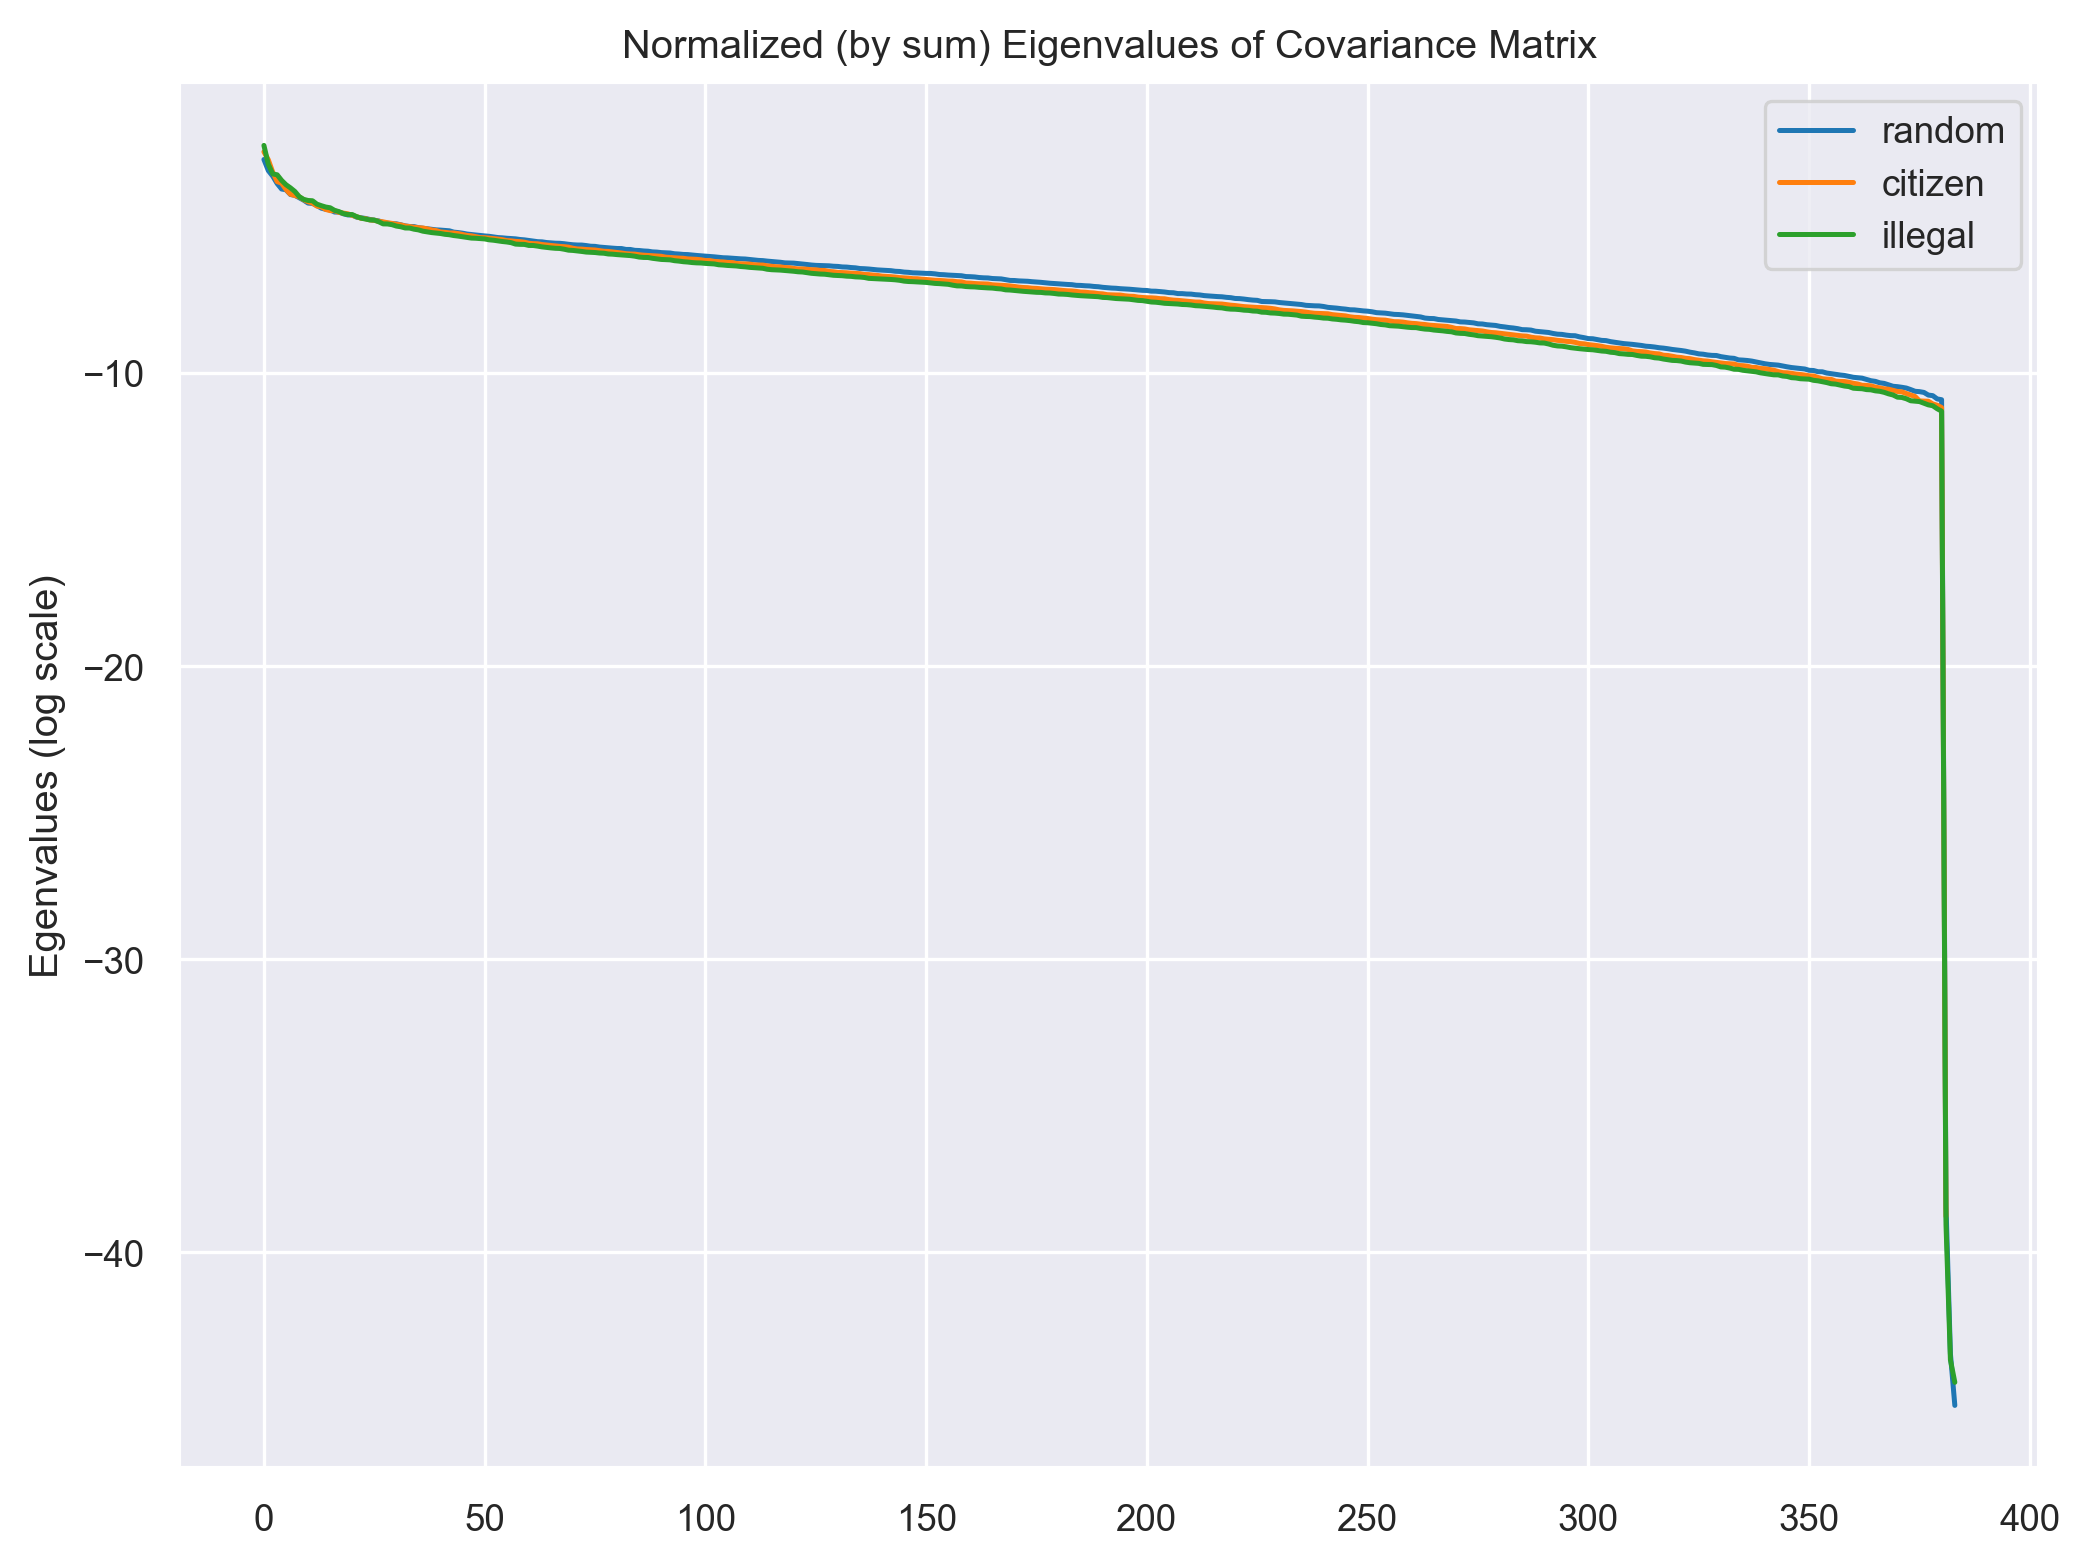

In [23]:
# calculate the sum of eigenvalues
sum_random = sum(eigenvalues_random)
sum_citizen = sum(eigenvalues_citizen)
sum_illegal = sum(eigenvalues_illegal)
print("random: ", sum_random)
print("citizen: ", sum_citizen)
print("illegal: ", sum_illegal)
# print the largest eigenvalue
print("random max: ", max(eigenvalues_random))
print("citizen max: ", max(eigenvalues_citizen))
print("illegal max: ", max(eigenvalues_illegal))
# normalize the eigenvalues by the sum and plot
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8, 6), dpi=300)
plt.title("Normalized (by sum) Eigenvalues of Covariance Matrix")
plt.ylabel("Egenvalues (log scale)")
sns.lineplot(
    np.log(sorted(eigenvalues_random / sum_random, reverse=True)), label="random"
)
sns.lineplot(
    np.log(sorted(eigenvalues_citizen / sum_citizen, reverse=True)), label="citizen"
)
sns.lineplot(
    np.log(sorted(eigenvalues_illegal / sum_illegal, reverse=True)), label="illegal"
)


/var/folders/96/s986q0cx0_383y97_xl7jzdw0000gn/T/ipykernel_33926/3729960948.py:8: RuntimeWarning: invalid value encountered in log
  sns.lineplot(np.log(sorted(eigenvalues_citizen / eigenvalues_citizen.max(), reverse=True)), label="citizen")


<Axes: title={'center': 'Normalized eigenvalues (by max) of Covariance Matrix'}, ylabel='eigenvalues (log scale)'>

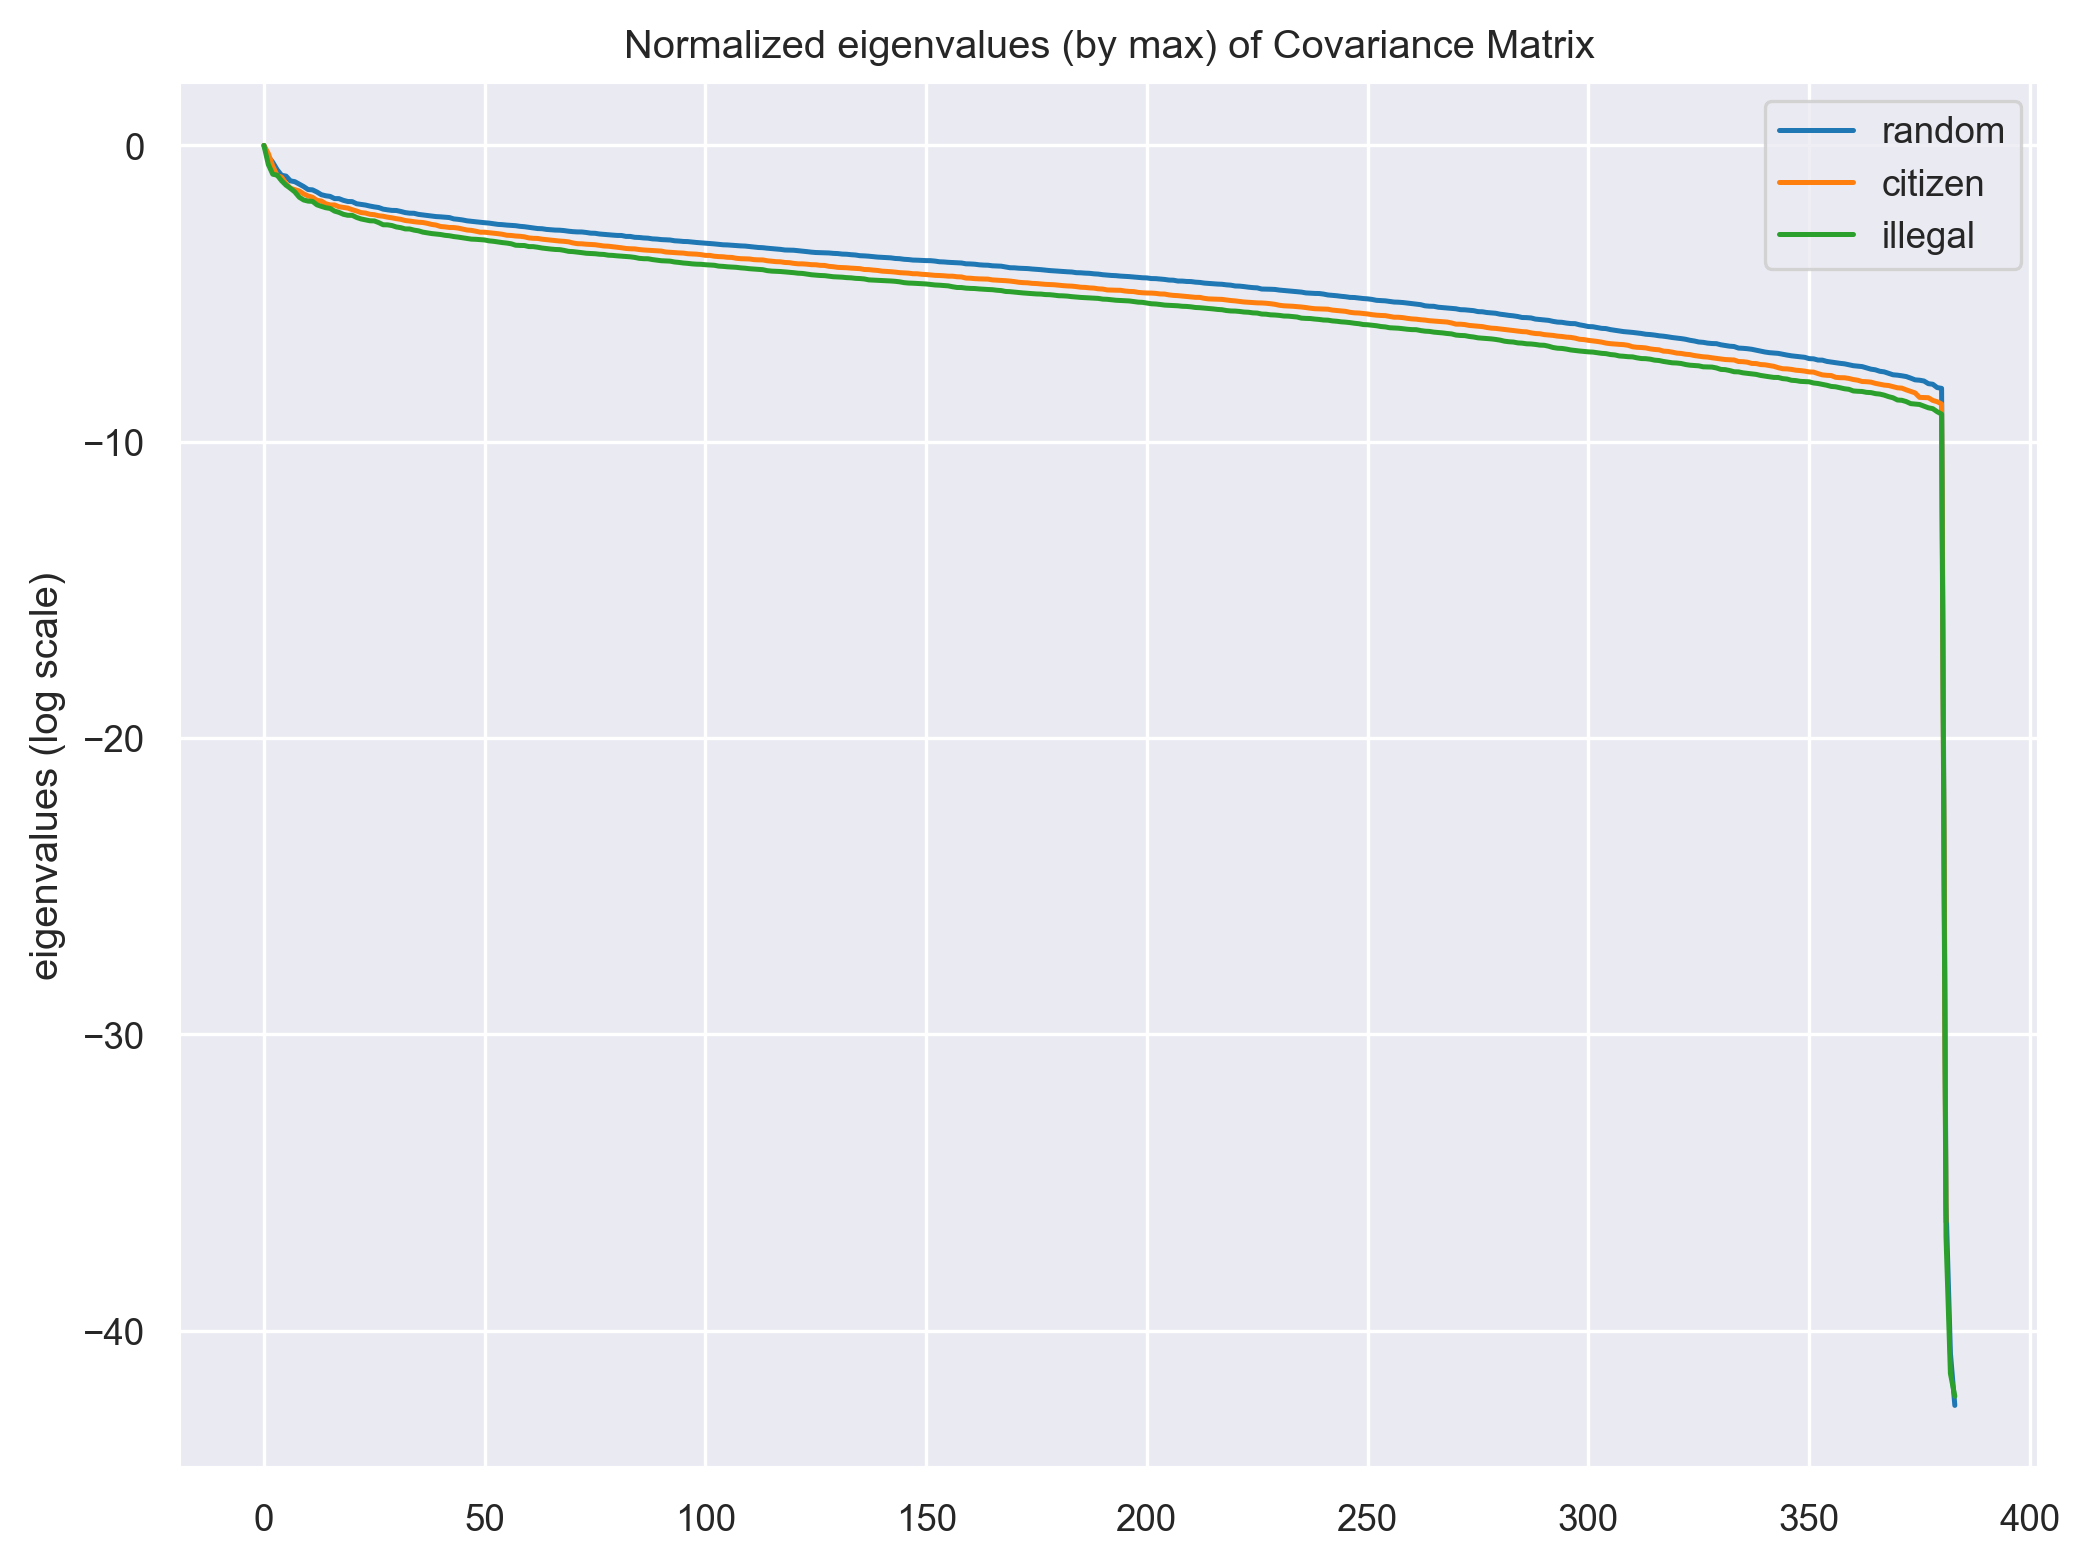

In [24]:
# nomalize the eigenvalues by the first largest eigenvalue and plot
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8, 6), dpi=300)
plt.title("Normalized eigenvalues (by max) of Covariance Matrix")
plt.ylabel("eigenvalues (log scale)")
sns.lineplot(
    np.log(sorted(eigenvalues_random / eigenvalues_random.max(), reverse=True)),
    label="random",
)
sns.lineplot(
    np.log(sorted(eigenvalues_citizen / eigenvalues_citizen.max(), reverse=True)),
    label="citizen",
)
sns.lineplot(
    np.log(sorted(eigenvalues_illegal / eigenvalues_illegal.max(), reverse=True)),
    label="illegal",
)


<Axes: title={'center': 'First 10 Eigenvalues of Covariance Matrix'}, ylabel='Egenvalues (log scale)'>

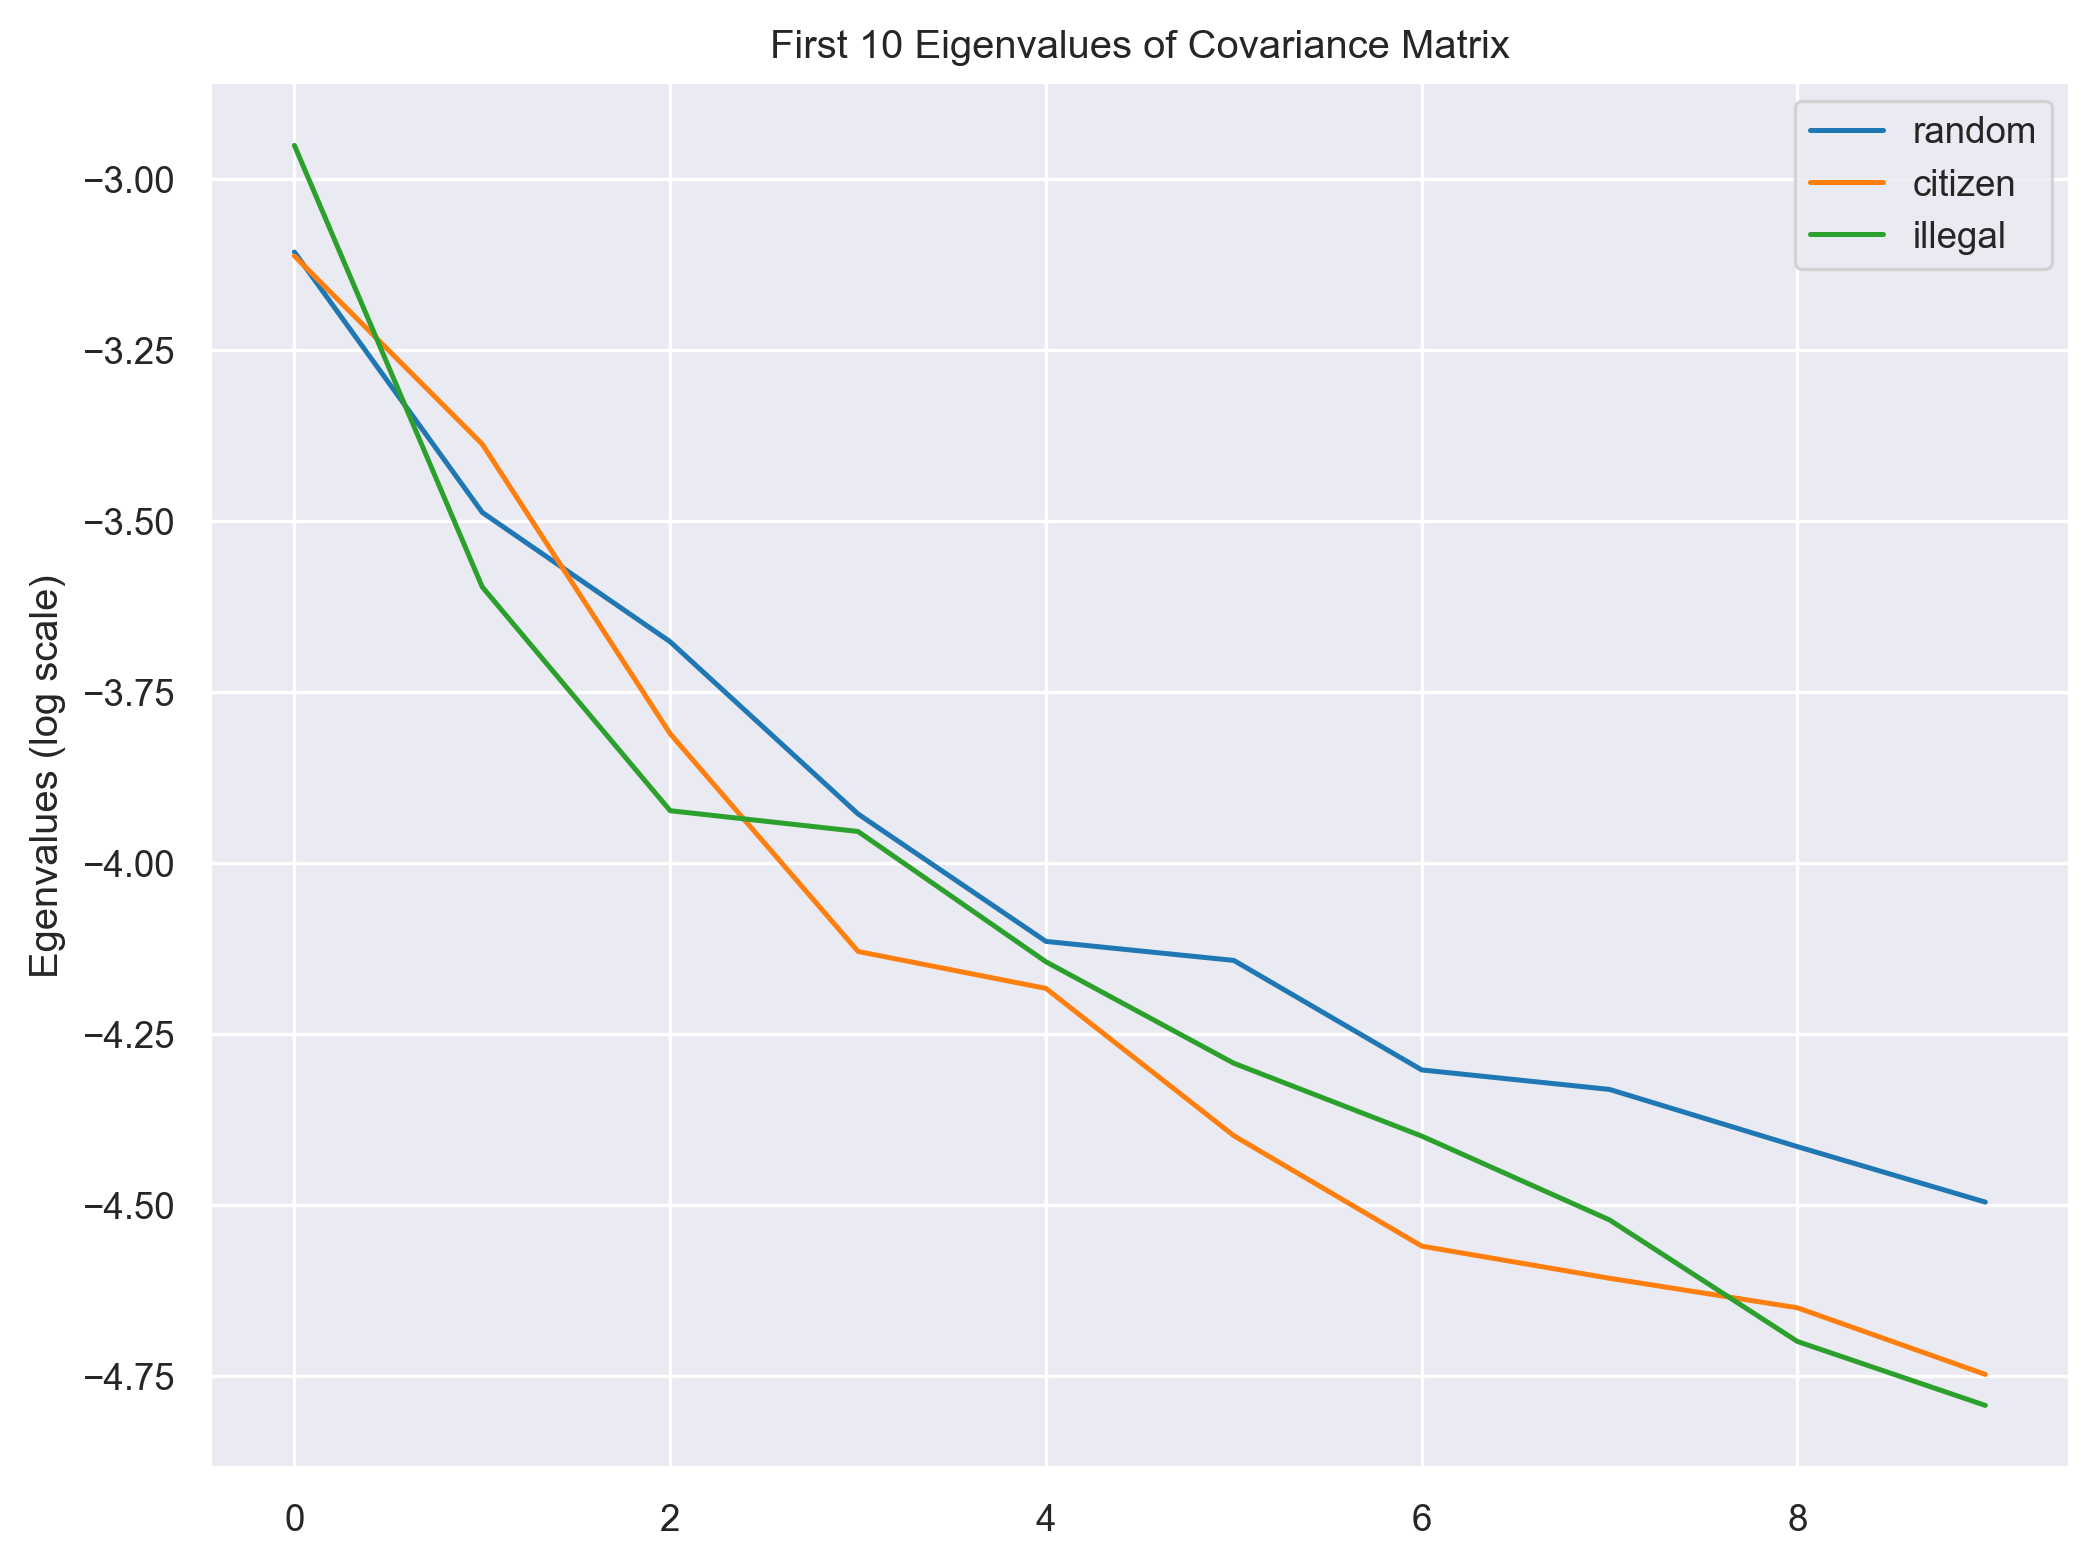

In [25]:
# plot the first 10 eigenvalues
plt.figure(figsize=(8, 6), dpi=300)
plt.title("First 10 Eigenvalues of Covariance Matrix")
plt.ylabel("Egenvalues (log scale)")
sns.lineplot(
    np.log(sorted(eigenvalues_random, reverse=True)[:10]),
    label="random",
)
sns.lineplot(
    np.log(sorted(eigenvalues_citizen, reverse=True)[:10]),
    label="citizen",
)
sns.lineplot(
    np.log(sorted(eigenvalues_illegal, reverse=True)[:10]),
    label="illegal",
)


## Compare covariance matrices between sample (50) and full corpus


In [13]:
# encode the messages


random_embedding = model.encode(
    random["Message"].drop_duplicates().tolist(), show_progress_bar=True
)


citizen_embedding = model.encode(
    citizen["Message"].drop_duplicates().tolist(), show_progress_bar=True
)

NameError: name 'random' is not defined

In [7]:
# calculate the covariance matrix
covariance_random = np.cov(random_embedding.T)
covariance_citizen = np.cov(citizen_embedding.T)


In [31]:
# select 100 random samples of 50 for each corpus
randoms = pd.DataFrame()
citizens = pd.DataFrame()
for i in range(100):
    random_samples = random.sample(50)
    citizen_samples = citizen.sample(50)
    randoms = pd.concat([randoms, random_samples])
    citizens = pd.concat([citizens, citizen_samples])


In [32]:
randoms["Message"].drop_duplicates().shape

(3677,)

In [33]:
randoms.to_csv("../data/randoms.csv", index=False)
citizens.to_csv("../data/citizens.csv", index=False)


# Compare the embeddings of overall and sampled summaries


In [5]:
import torch
from IPython.display import clear_output
from sentence_transformers import SentenceTransformer

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SentenceTransformer("BAAI/bge-base-en-v1.5", device=device)

pattern = r"\[\/INST\].*"

# define pattern to match left parathesis (
paranthesis = r"\(*"

clear_output()


In [6]:
# Compare the embeddings of overall and sampled summaries
randoms = pd.read_csv("../data/random.csv")
citizens = pd.read_csv("../data/full_citizenship_question.csv")
randoms_sampled = pd.read_csv("../data/randoms.csv")
citizens_sampled = pd.read_csv("../data/citizens.csv")
randoms_summaries = pd.read_csv("../data/randoms_summaries.csv")
randoms_summaries["summary"] = randoms_summaries["summary"].apply(
    lambda x: re.sub(pattern, "", x)
)
randoms_summaries["summary"] = randoms_summaries["summary"].apply(
    lambda x: re.sub(paranthesis, "", x)
)
citizens_summaries = pd.read_csv("../data/citizens_summaries.csv")
citizens_summaries["summary"] = citizens_summaries["summary"].apply(
    lambda x: re.sub(pattern, "", x)
)
citizens_summaries["summary"] = citizens_summaries["summary"].apply(
    lambda x: re.sub(paranthesis, "", x)
)


In [7]:
# encode the messages
random_embedding = model.encode(
    randoms["Message"].drop_duplicates().tolist(), show_progress_bar=True
)
citizen_embedding = model.encode(
    citizens["Message"].drop_duplicates().tolist(), show_progress_bar=True
)
randoms_sampled_embedding = model.encode(
    randoms_sampled["Message"].tolist(), show_progress_bar=True
)
citizens_sampled_embedding = model.encode(
    citizens_sampled["Message"].tolist(), show_progress_bar=True
)
randoms_summaries_embedding = model.encode(
    randoms_summaries["summary"].drop_duplicates().tolist(), show_progress_bar=True
)
citizens_summaries_embedding = model.encode(
    citizens_summaries["summary"].drop_duplicates().tolist(), show_progress_bar=True
)
clear_output()


In [9]:
import numpy as np

# compute the covariance matrix
covariance_random = np.cov(random_embedding.T)
covariance_citizen = np.cov(citizen_embedding.T)
covariance_randoms_summaries = np.cov(randoms_summaries_embedding.T)
covariance_citizens_summaries = np.cov(citizens_summaries_embedding.T)


In [10]:
type(covariance_random)

numpy.ndarray

In [28]:
# save the covariance matrices AND also remove the header

pd.DataFrame(covariance_randoms_summaries).to_csv(
    "../data/covariance_randoms_summaries.csv", index=False, header=False
)
pd.DataFrame(covariance_random).to_csv(
    "../data/covariance_random.csv", index=False, header=False
)
pd.DataFrame(covariance_citizens_summaries).to_csv(
    "../data/covariance_citizens_summaries.csv", index=False, header=False
)
pd.DataFrame(covariance_citizen).to_csv(
    "../data/covariance_citizen.csv", index=False, header=False
)


In [41]:
import pandas as pd

# Read covariance matrices
covariance_random = pd.read_csv("../data/covariance_random.csv", header=None)
covariance_citizen = pd.read_csv("../data/covariance_citizen.csv", header=None)
covariance_randoms_summaries = pd.read_csv(
    "../data/covariance_randoms_summaries.csv", header=None
)
covariance_citizens_summaries = pd.read_csv(
    "../data/covariance_citizens_summaries.csv", header=None
)


In [2]:
covariance_citizen.shape

(768, 768)

In [11]:
# Calculate the eigenvalues and eigenvectors
eigenvalues_random, eigenvectors_random = np.linalg.eig(covariance_random)
eigenvalues_citizen, eigenvectors_citizen = np.linalg.eig(covariance_citizen)
eigenvalues_randoms_summaries, eigenvectors_randoms_summaries = np.linalg.eig(
    covariance_randoms_summaries
)
eigenvalues_citizens_summaries, eigenvectors_citizens_summaries = np.linalg.eig(
    covariance_citizens_summaries
)


In [12]:
# sort the eigenvalues and corresponding eigenvectors
idx_random = eigenvalues_random.argsort()[::-1]
eigenvalues_random = eigenvalues_random[idx_random]
eigenvectors_random = eigenvectors_random[:, idx_random]

idx_citizen = eigenvalues_citizen.argsort()[::-1]
eigenvalues_citizen = eigenvalues_citizen[idx_citizen]
eigenvectors_citizen = eigenvectors_citizen[:, idx_citizen]

idx_randoms_summaries = eigenvalues_randoms_summaries.argsort()[::-1]
eigenvalues_randoms_summaries = eigenvalues_randoms_summaries[idx_randoms_summaries]
eigenvectors_randoms_summaries = eigenvectors_randoms_summaries[
    :, idx_randoms_summaries
]

idx_citizens_summaries = eigenvalues_citizens_summaries.argsort()[::-1]
eigenvalues_citizens_summaries = eigenvalues_citizens_summaries[idx_citizens_summaries]
eigenvectors_citizens_summaries = eigenvectors_citizens_summaries[
    :, idx_citizens_summaries
]


/Users/maoli/miniconda3/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:170: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: title={'center': 'Normalized Eigenvalues of Covariance Matrix'}, ylabel='Eigenvalues (log scale)'>

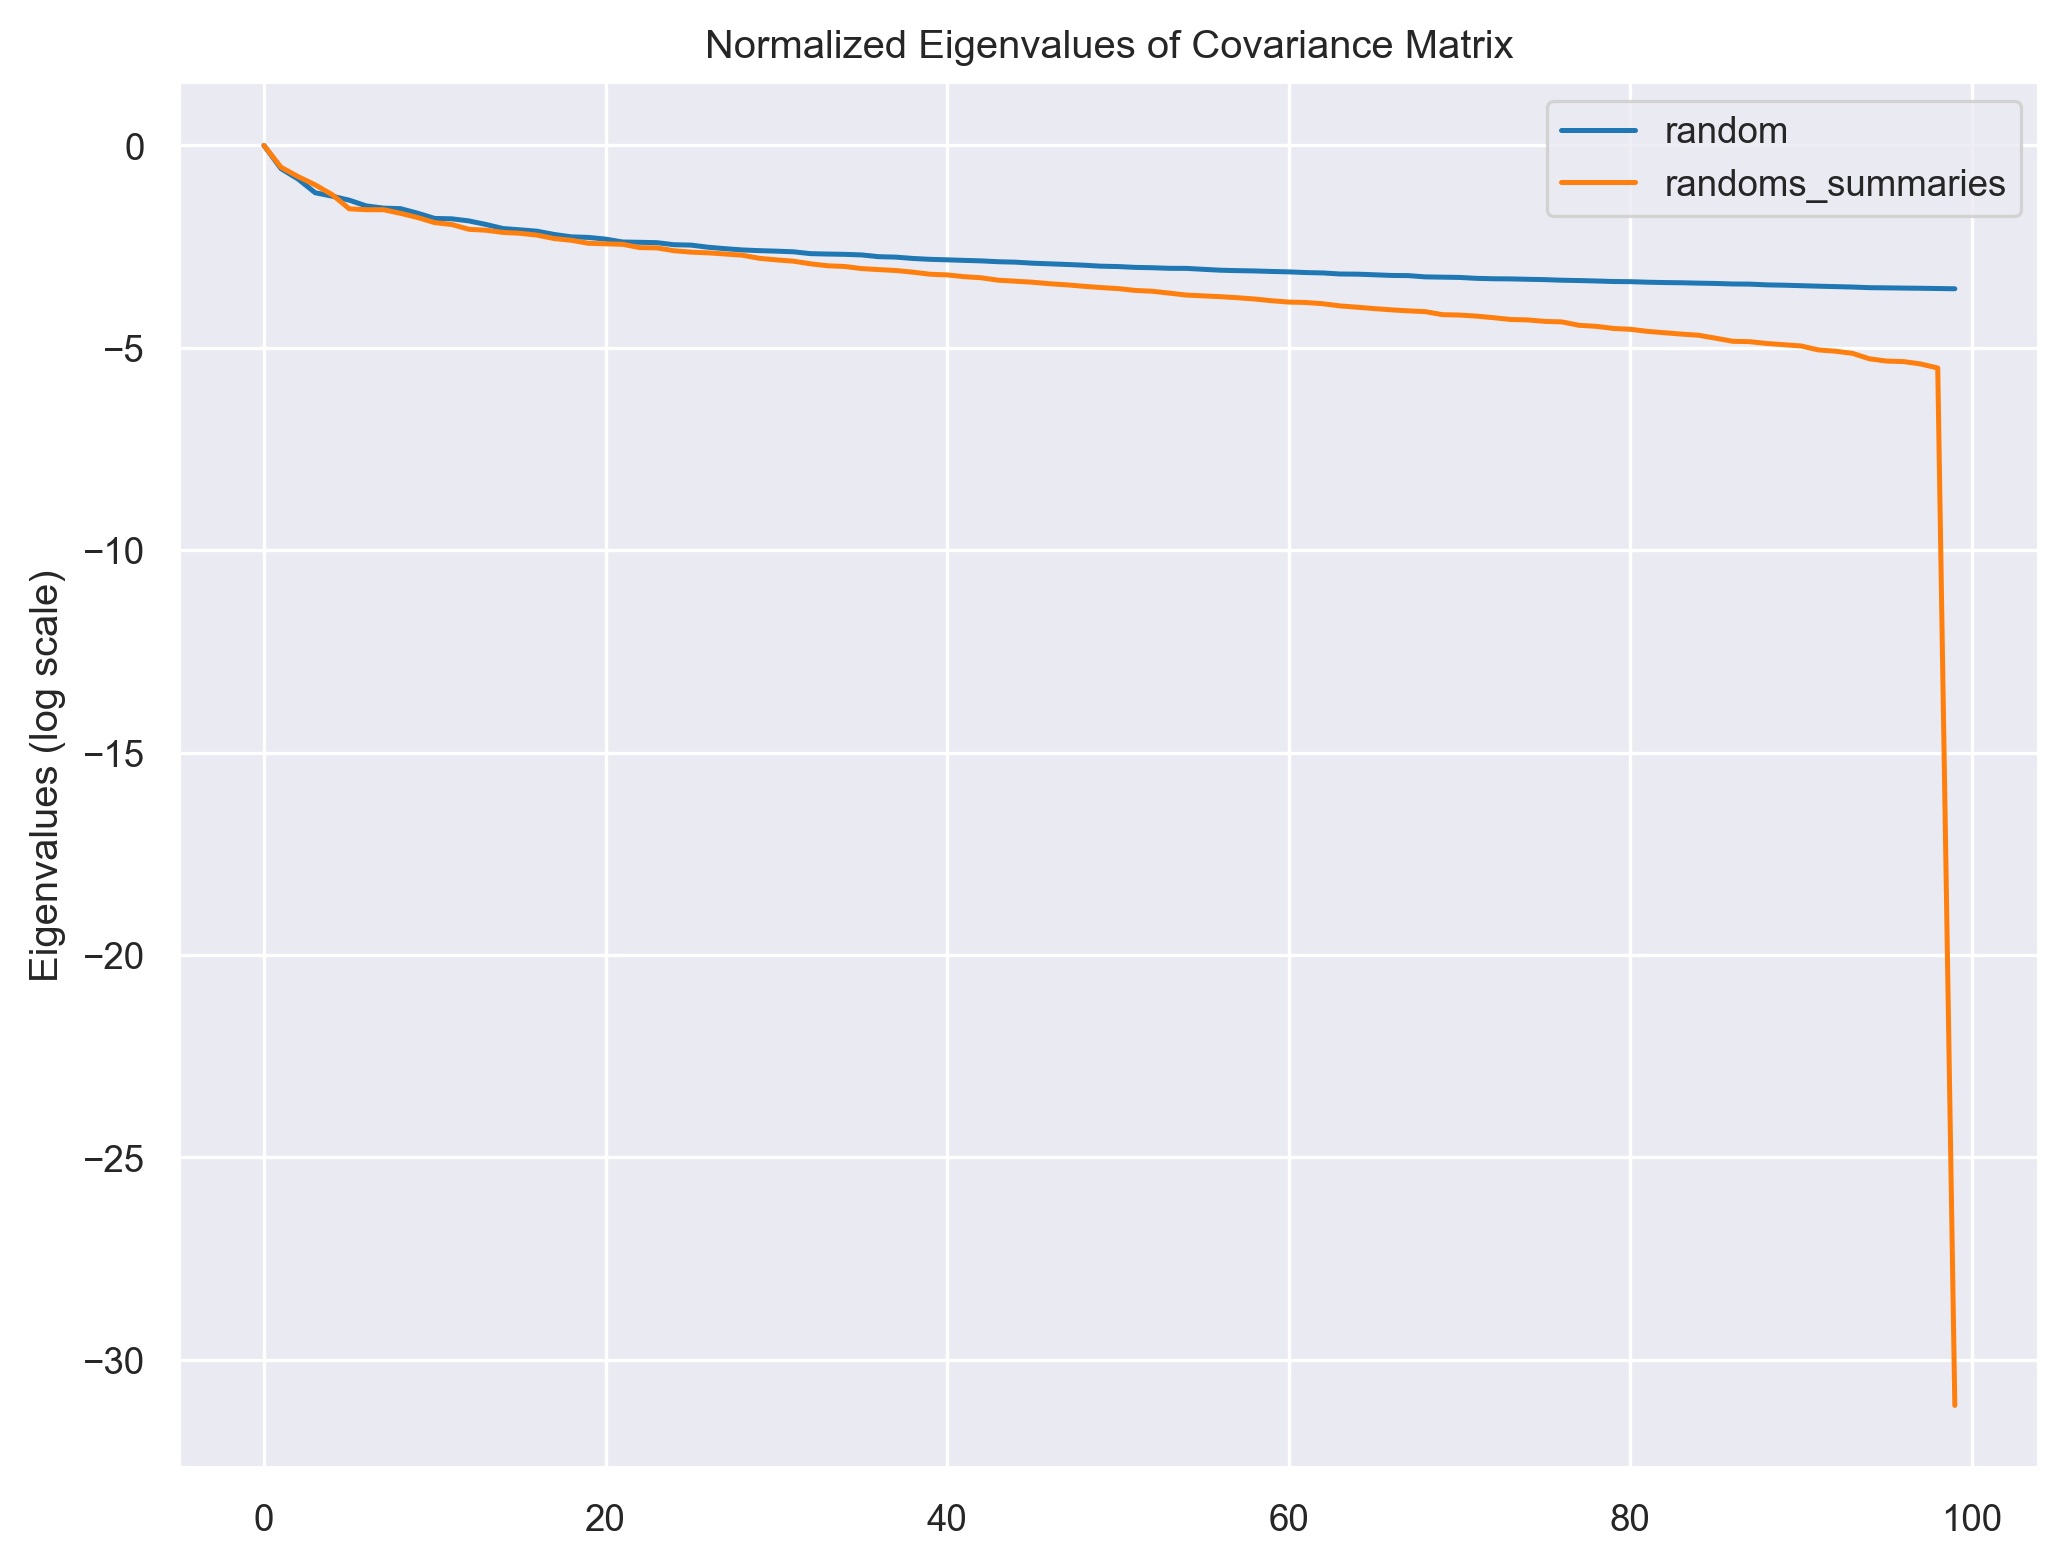

In [5]:
# plot eigenvalues normalized by the max
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8, 6), dpi=300)
plt.title("Normalized Eigenvalues of Covariance Matrix")
plt.ylabel("Eigenvalues (log scale)")
sns.lineplot(
    np.log(
        sorted(eigenvalues_random[:100] / max(eigenvalues_random[:100]), reverse=True)
    ),
    label="random",
)

sns.lineplot(
    np.log(
        sorted(
            eigenvalues_randoms_summaries[:100]
            / max(eigenvalues_randoms_summaries[:100]),
            reverse=True,
        )
    ),
    label="randoms_summaries",
)


/Users/maoli/miniconda3/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:170: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: >

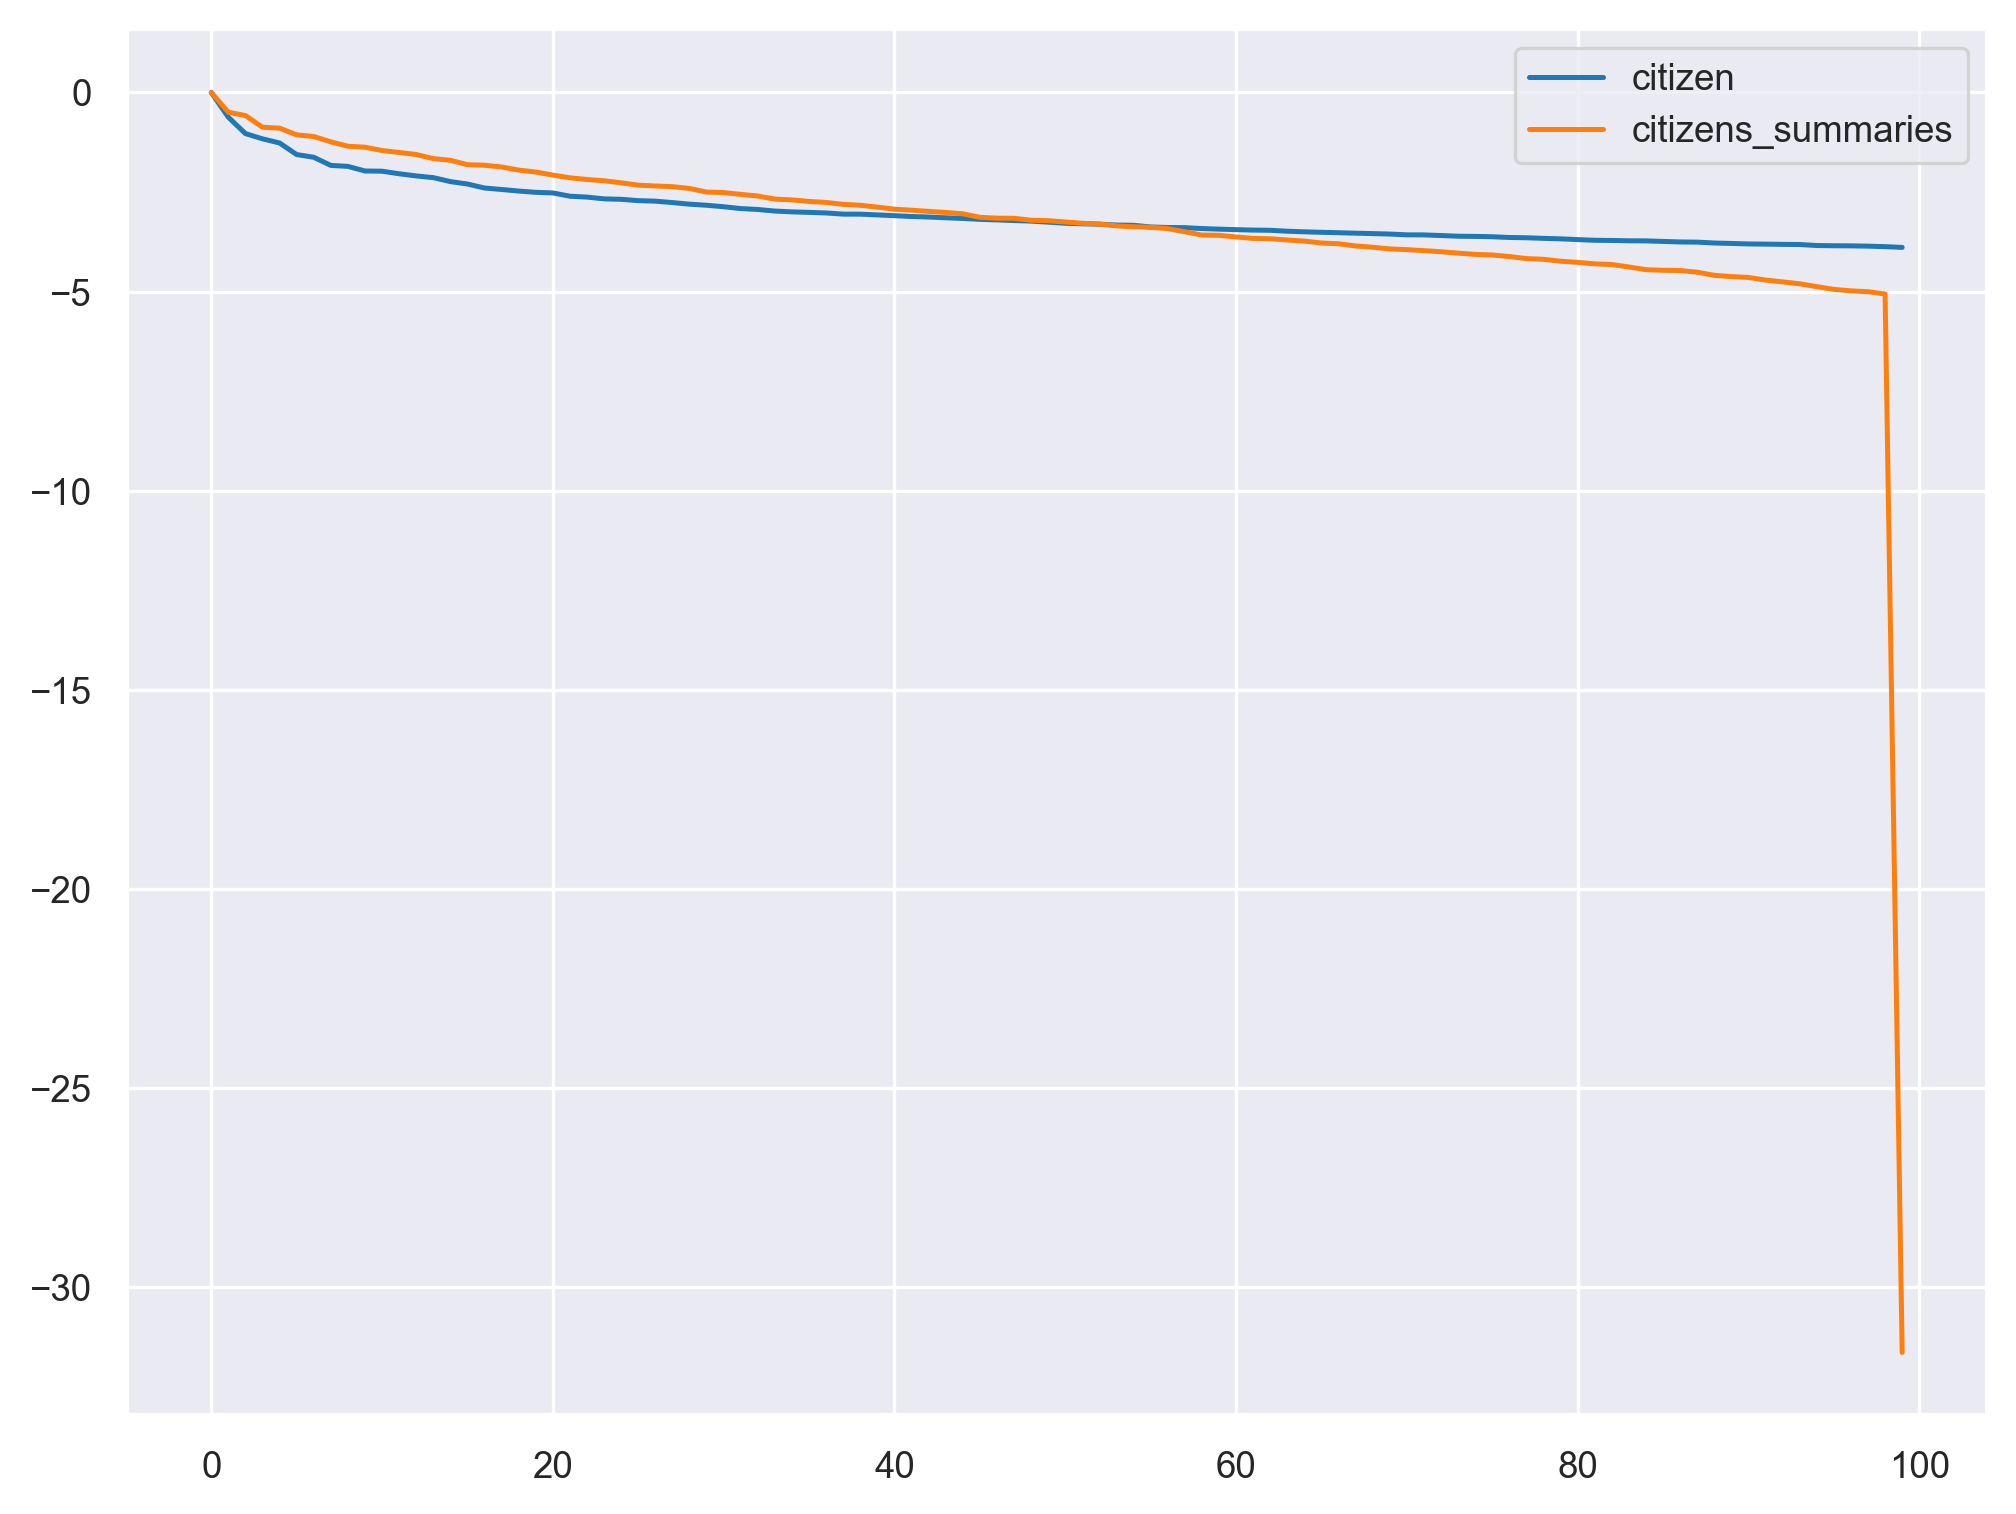

In [6]:
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8, 6), dpi=300)
# plot for citizen
sns.lineplot(
    np.log(
        sorted(eigenvalues_citizen[:100] / max(eigenvalues_citizen[:100]), reverse=True)
    ),
    label="citizen",
)

sns.lineplot(
    np.log(
        sorted(
            eigenvalues_citizens_summaries[:100]
            / max(eigenvalues_citizens_summaries[:100]),
            reverse=True,
        )
    ),
    label="citizens_summaries",
)


In [7]:
results = np.array(
    [
        np.dot(
            np.dot(eigenvectors_random[:, i].T, covariance_randoms_summaries),
            eigenvectors_random[:, i],
        )
        for i in range(eigenvectors_random.shape[1])
    ]
)


<Axes: >

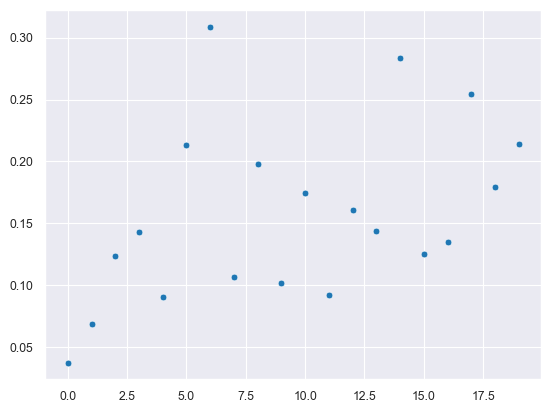

In [10]:
plt.figure(dpi=100)
sns.scatterplot(results[:20] / eigenvalues_random[:20])


<Axes: >

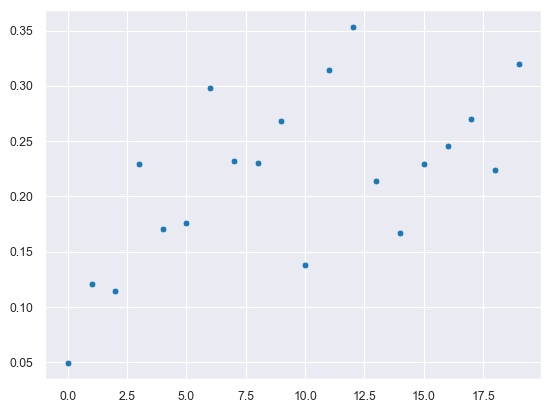

In [12]:
# do the same to citizen
results = np.array(
    [
        np.dot(
            np.dot(eigenvectors_citizen[:, i].T, covariance_citizens_summaries),
            eigenvectors_citizen[:, i],
        )
        for i in range(eigenvectors_citizen.shape[1])
    ]
)

plt.figure(dpi=100)
sns.scatterplot(results[:20] / eigenvalues_citizen[:20])


# sanity check


In [35]:
# create average embeddings for each summary (every 50 samples)
random_average = randoms_sampled_embedding.reshape(100, 50, -1).mean(axis=1)
citizen_average = citizens_sampled_embedding.reshape(100, 50, -1).mean(axis=1)
citizen_average_cov = np.cov(citizen_average.T)
random_average_cov = np.cov(random_average.T)


In [38]:
eigenvalues_citizen_average, eigenvectors_citizen_average = np.linalg.eig(
    citizen_average_cov
)
eigenvalues_random_average, eigenvectors_random_average = np.linalg.eig(
    random_average_cov
)
# sort the eigenvalues and corresponding eigenvectors
idx_random_average = eigenvalues_random_average.argsort()[::-1]
eigenvalues_random_average = eigenvalues_random_average[idx_random_average]
eigenvectors_random_average = eigenvectors_random_average[:, idx_random_average]

idx_citizen_average = eigenvalues_citizen_average.argsort()[::-1]
eigenvalues_citizen_average = eigenvalues_citizen_average[idx_citizen_average]
eigenvectors_citizen_average = eigenvectors_citizen_average[:, idx_citizen_average]


c:\Users\Mao\miniconda3\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: title={'center': 'Normalized Eigenvalues of Covariance Matrix'}, ylabel='Eigenvalues (log scale)'>

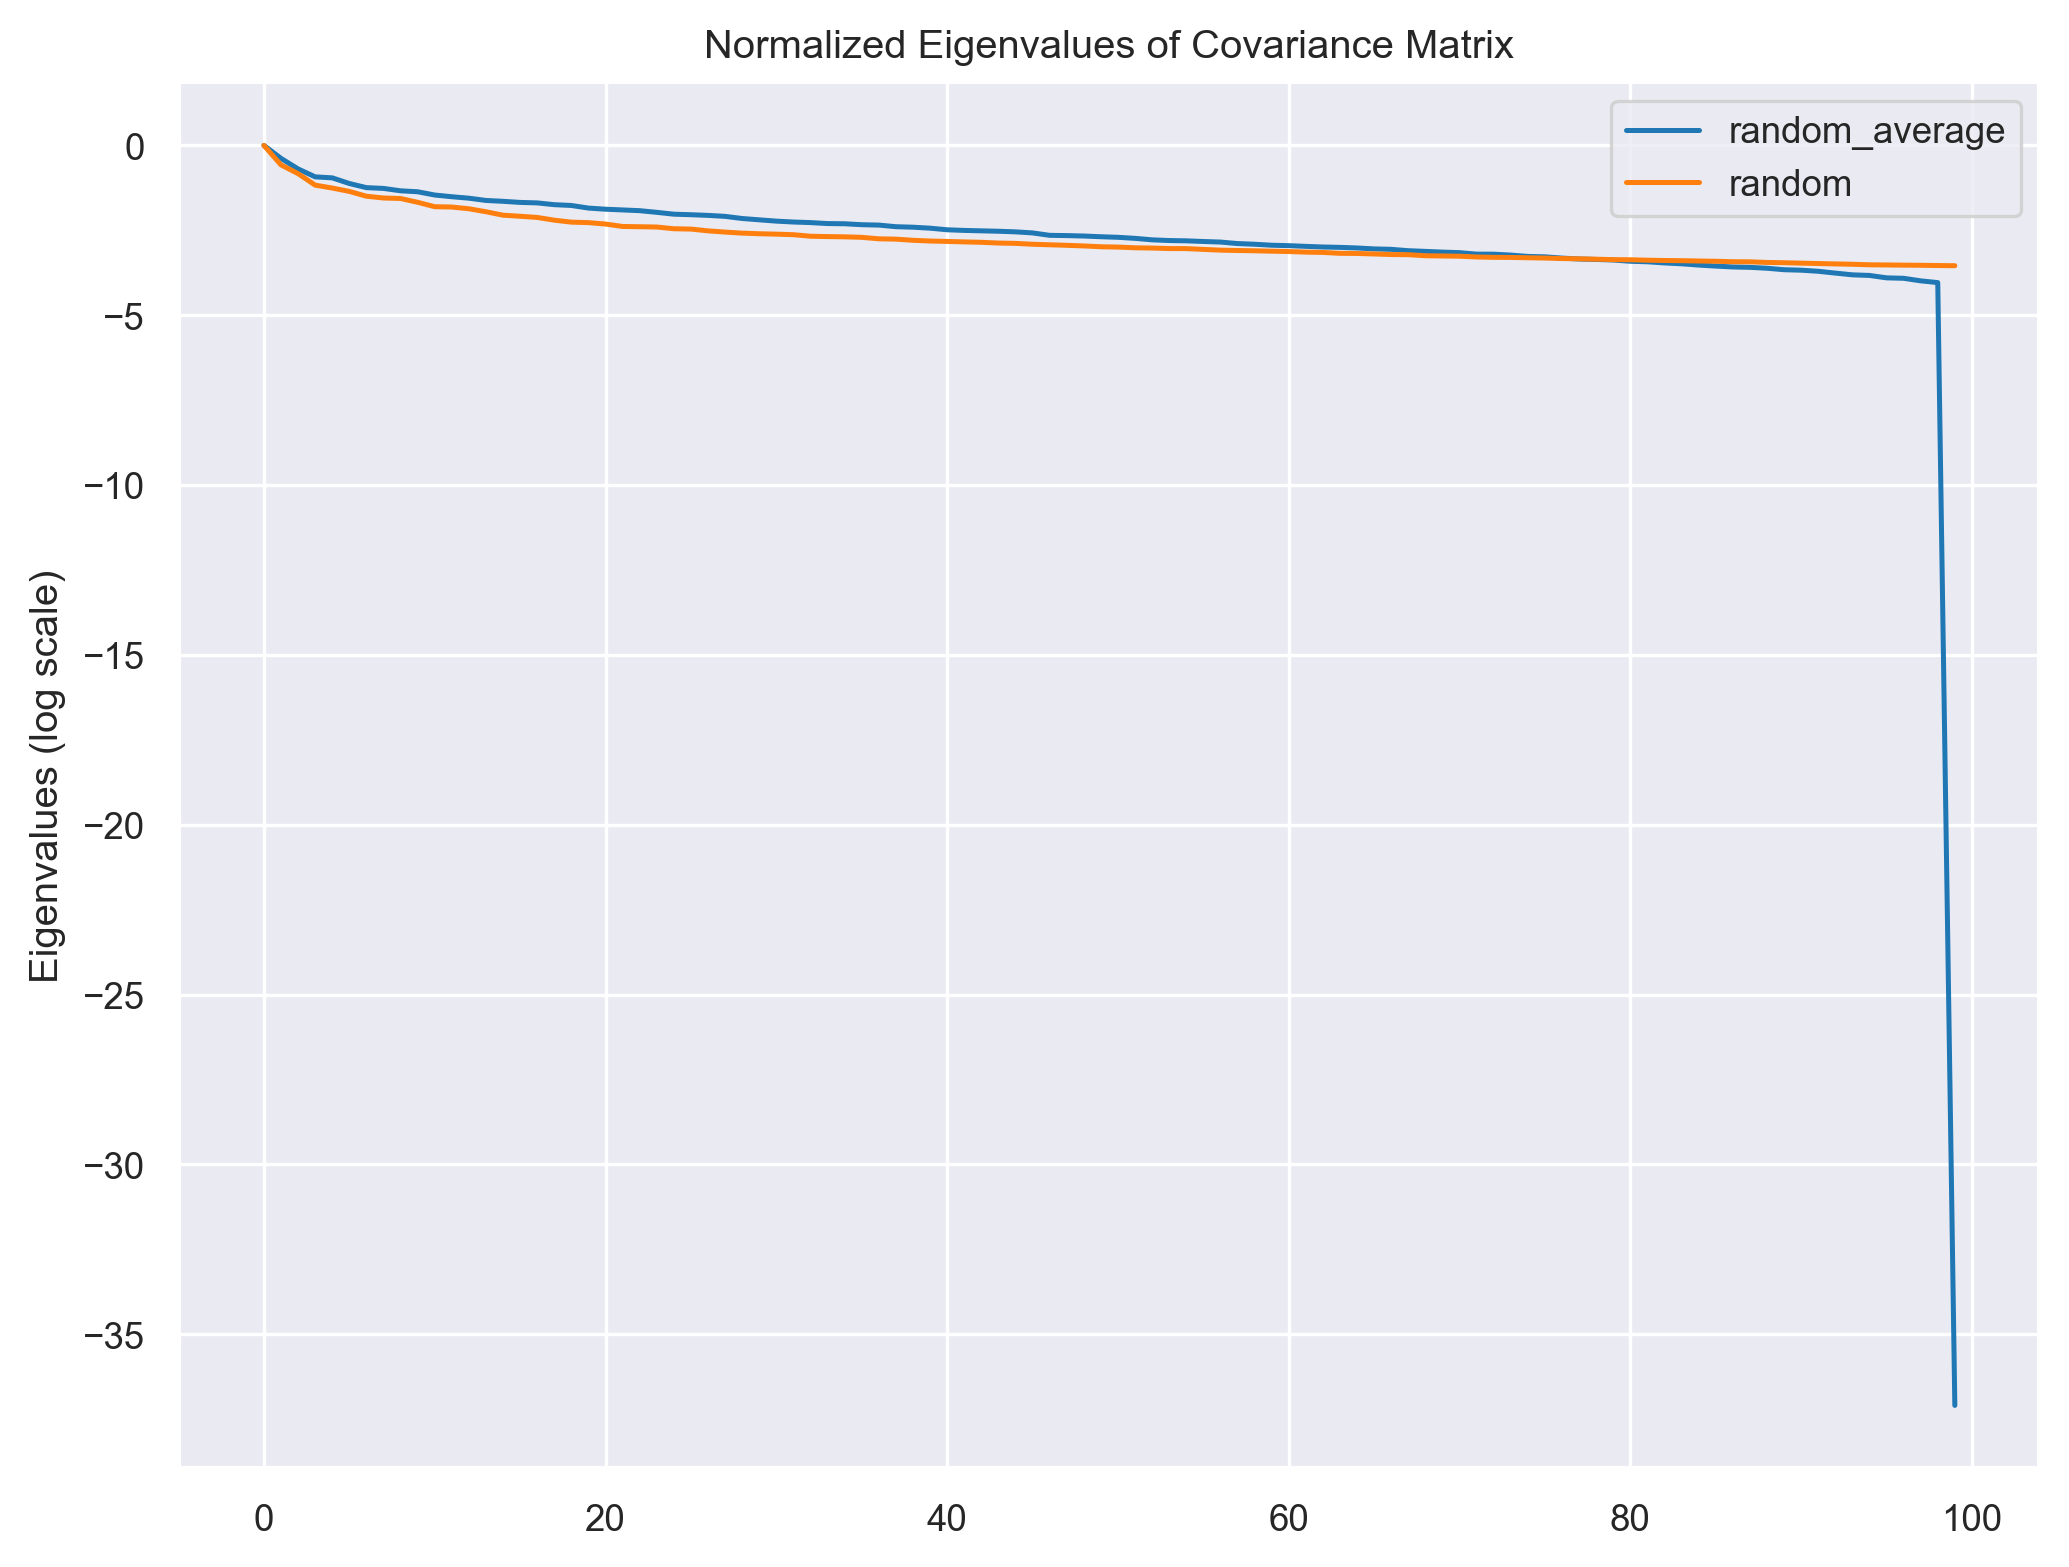

In [46]:
# plot the eigenvalues
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8, 6), dpi=300)
plt.title("Normalized Eigenvalues of Covariance Matrix")
plt.ylabel("Eigenvalues (log scale)")
sns.lineplot(
    np.log(
        sorted(
            eigenvalues_random_average[:100] / max(eigenvalues_random_average[:100]),
            reverse=True,
        )
    ),
    label="random_average",
)

sns.lineplot(
    np.log(
        sorted(
            eigenvalues_random[:100] / max(eigenvalues_random[:100]),
            reverse=True,
        )
    ),
    label="random",
)


c:\Users\Mao\miniconda3\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: >

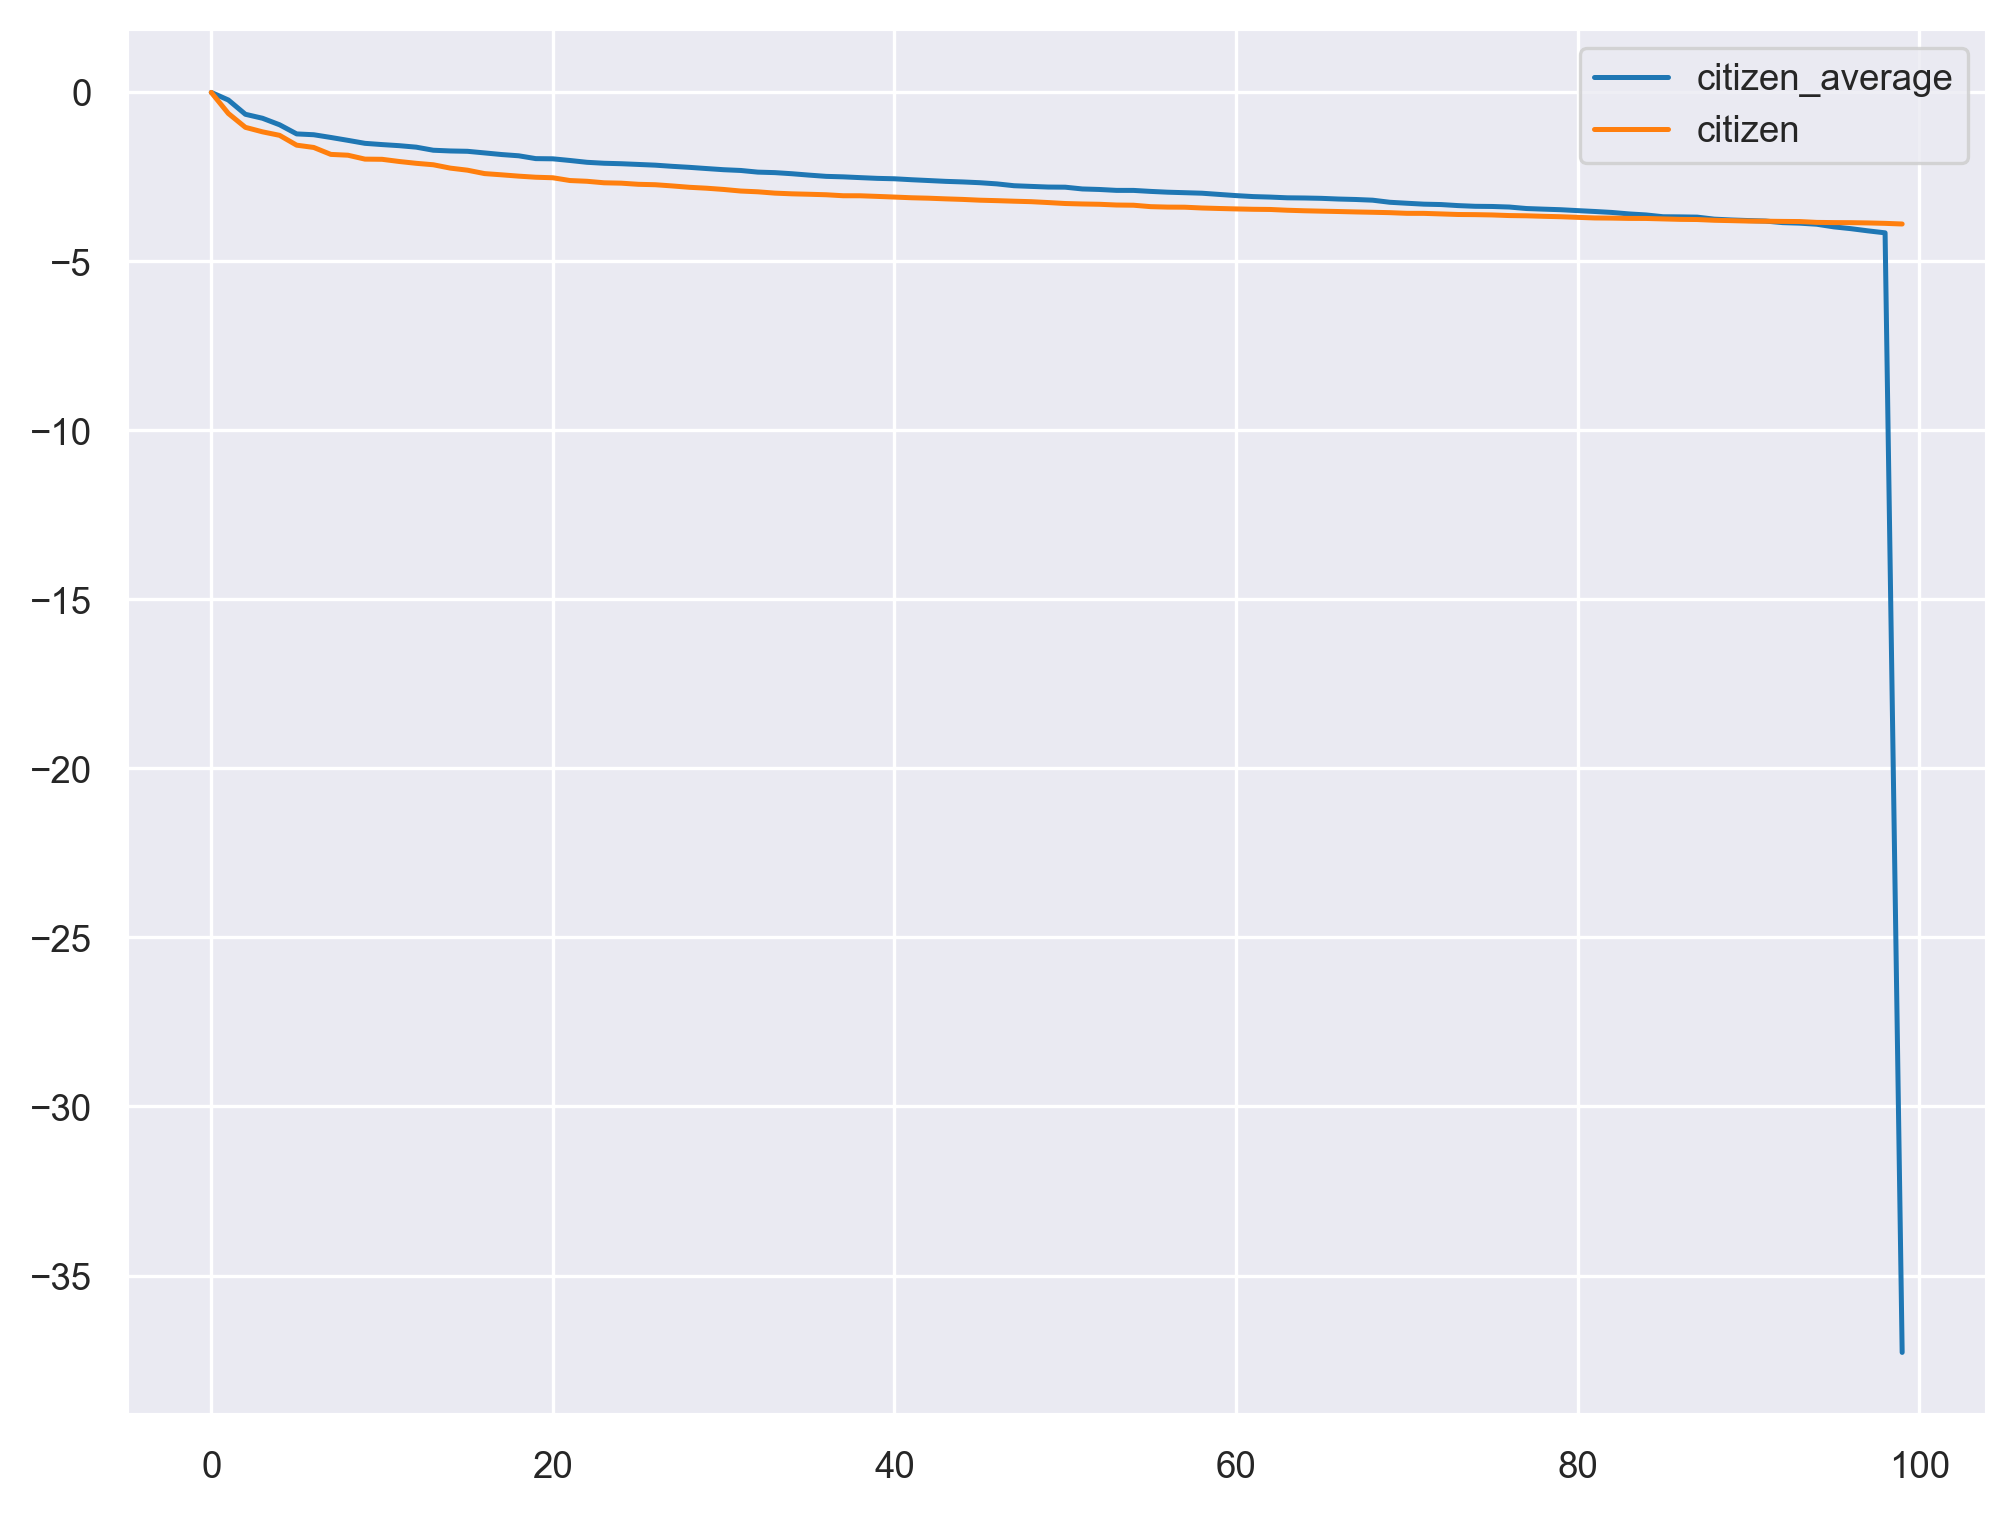

In [47]:
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8, 6), dpi=300)
# plot for citizen
sns.lineplot(
    np.log(
        sorted(
            eigenvalues_citizen_average[:100] / max(eigenvalues_citizen_average[:100]),
            reverse=True,
        )
    ),
    label="citizen_average",
)

sns.lineplot(
    np.log(
        sorted(
            eigenvalues_citizen[:100] / max(eigenvalues_citizen[:100]),
            reverse=True,
        )
    ),
    label="citizen",
)


<Axes: >

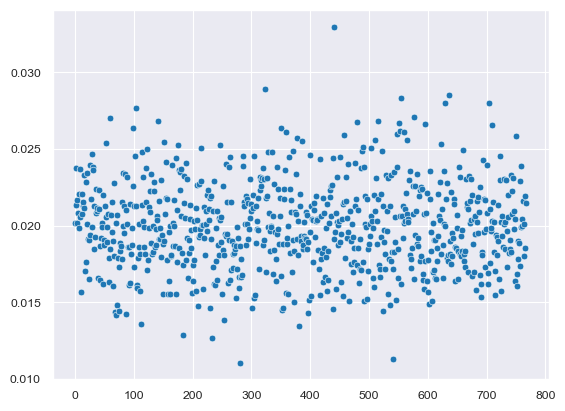

In [49]:
# scatter plot
results = np.array(
    [
        np.dot(
            np.dot(eigenvectors_random[:, i].T, random_average_cov),
            eigenvectors_random[:, i],
        )
        for i in range(eigenvectors_random_average.shape[1])
    ]
)

plt.figure(dpi=100)
sns.scatterplot(results / eigenvalues_random)


<Axes: >

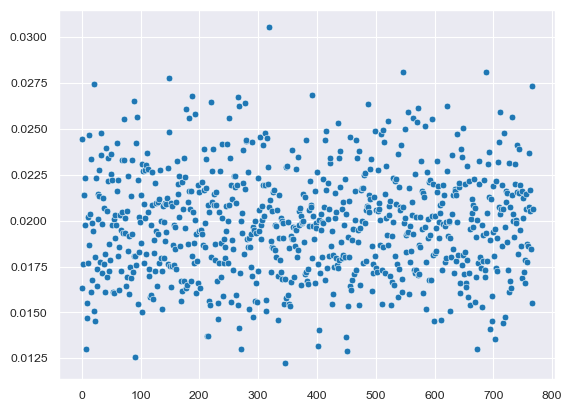

In [50]:
# do the same to citizen
results = np.array(
    [
        np.dot(
            np.dot(eigenvectors_citizen[:, i].T, citizen_average_cov),
            eigenvectors_citizen[:, i],
        )
        for i in range(eigenvectors_citizen_average.shape[1])
    ]
)

plt.figure(dpi=100)
sns.scatterplot(results / eigenvalues_citizen)


# Explore what eigenvectors means


In [45]:
from numpy import dot
from numpy.linalg import norm

cos_val = []
for i in range(5):
    cos_val_v = []
    vi = eigenvectors_citizen[:, i]
    for tweets in random_embedding:
        cos_val_v.append(dot(vi, tweets) / (norm(vi) * norm(tweets)))
    cos_val.append(cos_val_v)


In [59]:
# sort the cosine values and get id revert back to the original data
data = pd.DataFrame(
    columns=[
        "idx_v1",
        "Message_v1",
        "cos_v1",
        "idx_v2",
        "Message_v2",
        "cos_v2",
        "idx_v3",
        "Message_v3",
        "cos_v3",
        "idx_v4",
        "Message_v4",
        "cos_v4",
        "idx_v5",
        "Message_v5",
        "cos_v5",
    ]
)

for i, cos_val_v in enumerate(cos_val):
    cos_val_v = np.array(cos_val_v)
    idx = cos_val_v.argsort()[::-1]
    idx = idx[:20]
    data[f"idx_v{i+1}"] = idx
    data[f"Message_v{i+1}"] = randoms["Message"].iloc[idx].values
    data[f"cos_v{i+1}"] = cos_val_v[idx]


In [66]:
data.to_csv("../data/exploratory_random.csv", index=False)

In [67]:
# replicate for citizen
cos_val = []
for i in range(5):
    cos_val_v = []
    vi = eigenvectors_citizen[:, i]
    for tweets in citizen_embedding:
        cos_val_v.append(dot(vi, tweets) / (norm(vi) * norm(tweets)))
    cos_val.append(cos_val_v)


In [68]:
data = pd.DataFrame(
    columns=[
        "idx_v1",
        "Message_v1",
        "cos_v1",
        "idx_v2",
        "Message_v2",
        "cos_v2",
        "idx_v3",
        "Message_v3",
        "cos_v3",
        "idx_v4",
        "Message_v4",
        "cos_v4",
        "idx_v5",
        "Message_v5",
        "cos_v5",
    ]
)

for i, cos_val_v in enumerate(cos_val):
    cos_val_v = np.array(cos_val_v)
    idx = cos_val_v.argsort()[::-1]
    idx = idx[:20]
    data[f"idx_v{i+1}"] = idx
    data[f"Message_v{i+1}"] = citizens["Message"].iloc[idx].values
    data[f"cos_v{i+1}"] = cos_val_v[idx]


In [70]:
data.to_csv("../data/exploratory_citizen.csv", index=False)